<a href="https://colab.research.google.com/github/D-DePablos/WEW/blob/master/Stage%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 5: Speed of the CME

1.   Calculate the speed of the CME using observations.

Pick a coronagraph image where the CME bubble is clearly visible by selecting a frame nubmer in the box below. If you are happy with the image move on to the next cell. If not, run this cell again and pick another number.

Image number: 21


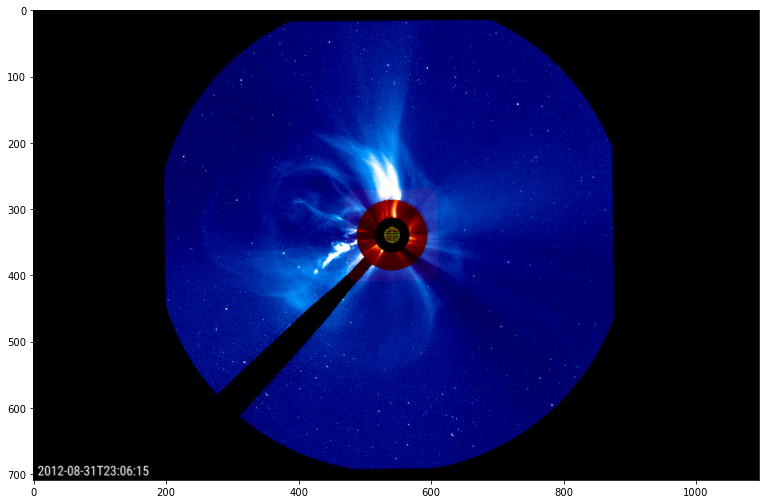

In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
! git clone https://github.com/andyto1234/WEW_PythonWorkshop_Database

#Fetch the coronagraph images
map_list = []
map_list = sorted(glob.glob('WEW_PythonWorkshop_Database/LASCO_images/*.png'))

filenumber = input('Image number: ')
filename = map_list[int(filenumber)]

#Read the image file
img = cv2.imread(filename)
#Set plot size
fig=plt.figure(figsize=(13,13))
#Plot image
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Now select two points on the image to calculate the distance the CME has travelled. First point should be at the center or surface of the sun. Second point should be at the top of the CME bubble. After selecting these two points, click any key to close the image window.

In [2]:
%matplotlib qt

In [5]:
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        coords.append([x,y]) 
        
coords = []

cv2.imshow('image', img)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
dist = np.linalg.norm(np.array(coords[1])-np.array(coords[0]))*63303
print('CME has travelled ', int(dist), ' km')

CME has travelled  12025904  km


In [20]:
t1 = input('Enter the time plasma structure erupted on the Sun (hh:mm)')
t2 = input('Enter the time plasma structure erupted is spotted in the coronagraph (hh:mm)')

Enter the time plasma structure erupted on the Sun (hh:mm)19:46
Enter the time plasma structure erupted is spotted in the coronagraph (hh:mm)23:06


In [21]:
type(t1)

str

In [22]:
t1_hour, t1_minute = [i for i in t1.split(":")]
t1 = int(t1_hour)*60*60 + int(t1_minute)*60

t2_hour, t2_minute = [i for i in t2.split(":")]
t2 = int(t2_hour)*60*60 + int(t2_minute)*60

In [24]:
t1

71160

Now calculate the speed.

In [26]:
v = dist/(t2-t1)
print('CME speed is: ', v, ' km/s')

CME speed is:  1002.1586680165098  km/s


## How soon does it hit the Earth

A key reason for us to observe the Sun is for predicting space weather. We need to know when a CME is hitting the Earth.

1.   Use the speed calculated to deduce the time plasma structures hit Earth.